##  Manipulacion de Datos  ##


In [38]:
%pylab inline 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('precision',5)

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cargando Datos de Excel
datosPersona = pd.read_excel('registroAutomotriz.xlsx', sheetname='Persona')
datosPersona

D:\Anaconda\Anaconda5\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,ID_DATA,NOMBRES,FEC_NACIMIENTO,GENERO,DEPARTAMENTO,PROVINCIA,DISTRITO
0,83727,WALTER GILBERTO,04/05/1967,M,UCAYALI,CORONEL PORTILLO,CAMPOVERDE
1,320687,ASENCION,25/03/1952,M,TUMBES,TUMBES,TUMBES
2,365401,ALFONSO,16/02/1952,M,TUMBES,ZARUMILLA,MATAPALO
3,431039,ANTONIETA SILVIA,10/05/1955,F,TACNA,TACNA,TACNA
4,450173,EPIFAMIA,05/11/1965,F,TACNA,TACNA,POCOLLAY
5,971769,VICTORIA,23/03/1962,F,SAN MARTIN,MARISCAL CACERES,CAMPANILLA
6,1072595,ANGEL,02/05/1965,M,SAN MARTIN,SAN MARTIN,TARAPOTO
7,1080628,HERNAN SEGUNDO,29/11/1951,M,LIMA,LIMA,LINCE
8,1080629,MORAIMA HAYDEE,25/04/1955,F,LIMA,LIMA,LINCE
9,1086232,HITLER,23/06/1964,M,SAN MARTIN,SAN MARTIN,MORALES


In [3]:
#Cargando Datos de Excel
datosVehiculo = pd.read_excel('registroAutomotriz.xlsx', sheetname='Vehiculo')
datosVehiculo

D:\Anaconda\Anaconda5\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,ID_DATA,FABRICACION,MARCA,MODELO,COLOR,COMBUSTIBLE,ASIENTOS
0,16630266,2015,HYUNDAI,TUCSON,GUINDA,GASOLINA,5
1,6441822,2015,HYUNDAI,TUCSON,GUINDA,GASOLINA,5
2,6699123,2015,NISSAN,X-TRAIL,GRIS,GASOLINA,7
3,8234022,2015,NISSAN,PATHFINDER,ROJO,GASOLINA,7
4,28285201,2015,TOYOTA,YARIS,PLATA,GASOLINA,5
5,41568660,2015,TOYOTA,HILUX,TURQUESA OSCURO MICA,DIESEL,5
6,25714983,2015,TOYOTA,HILUX,NEGRO MICA,DIESEL,5
7,17627464,2015,TOYOTA,HILUX,ROJO,DIESEL,5
8,40488354,2015,SSANGYONG,NaN,BLANCO GRAND,GASOLINA,5
9,41095477,2015,NISSAN,QASHQAI,NEGRO METALICO,GASOLINA,5


In [4]:
# Unir datos
mergeDatos = pd.merge(datosPersona, datosVehiculo)

In [5]:
mergeDatos

,ID_DATA,NOMBRES,FEC_NACIMIENTO,GENERO,DEPARTAMENTO,PROVINCIA,DISTRITO,FABRICACION,MARCA,MODELO,COLOR,COMBUSTIBLE,ASIENTOS
0,83727,WALTER GILBERTO,04/05/1967,M,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,2015,VOLKSWAGEN,CROSSFOX,GRIS QUARZO,GASOLINA,5
1,320687,ASENCION,25/03/1952,M,TUMBES,TUMBES,TUMBES,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
2,365401,ALFONSO,16/02/1952,M,TUMBES,ZARUMILLA,MATAPALO,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
3,431039,ANTONIETA SILVIA,10/05/1955,F,TACNA,TACNA,TACNA,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
4,450173,EPIFAMIA,05/11/1965,F,TACNA,TACNA,POCOLLAY,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
5,971769,VICTORIA,23/03/1962,F,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,2015,SUZUKI,GRAND NOMADE,DORADO,GASOLINA,5
6,1072595,ANGEL,02/05/1965,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,TOYOTA,HILUX,TURQUESA OSCURO MICA,DIESEL,5
7,1080628,HERNAN SEGUNDO,29/11/1951,M,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
8,1080629,MORAIMA HAYDEE,25/04/1955,F,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
9,1121250,ENRIQUE,30/09/1971,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,HYUNDAI,TUCSON,GUINDA,GASOLINA,5


In [6]:
# Visualizar datos de una celda especifica
detalleCelda = mergeDatos.ix[483]
detalleCelda

D:\Anaconda\Anaconda5\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ID_DATA             15598576
NOMBRES                 JOSE
FEC_NACIMIENTO    28/05/1951
GENERO                     M
DEPARTAMENTO            LIMA
PROVINCIA             HUARAL
DISTRITO              HUARAL
FABRICACION             2015
MARCA                CHANGAN
MODELO                   NaN
COLOR                  PLATA
COMBUSTIBLE         GASOLINA
ASIENTOS                  11
Name: 483, dtype: object

In [7]:
# Clone DataFrame
def cloneDataFrame(df):
    return pd.DataFrame(df.values.copy(), df.index.copy(), df.columns.copy()).convert_objects(convert_numeric=True)

In [8]:
newData = cloneDataFrame(mergeDatos)

D:\Anaconda\Anaconda5\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
newData

,ID_DATA,NOMBRES,FEC_NACIMIENTO,GENERO,DEPARTAMENTO,PROVINCIA,DISTRITO,FABRICACION,MARCA,MODELO,COLOR,COMBUSTIBLE,ASIENTOS
0,83727,WALTER GILBERTO,04/05/1967,M,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,2015,VOLKSWAGEN,CROSSFOX,GRIS QUARZO,GASOLINA,5
1,320687,ASENCION,25/03/1952,M,TUMBES,TUMBES,TUMBES,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
2,365401,ALFONSO,16/02/1952,M,TUMBES,ZARUMILLA,MATAPALO,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
3,431039,ANTONIETA SILVIA,10/05/1955,F,TACNA,TACNA,TACNA,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
4,450173,EPIFAMIA,05/11/1965,F,TACNA,TACNA,POCOLLAY,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
5,971769,VICTORIA,23/03/1962,F,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,2015,SUZUKI,GRAND NOMADE,DORADO,GASOLINA,5
6,1072595,ANGEL,02/05/1965,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,TOYOTA,HILUX,TURQUESA OSCURO MICA,DIESEL,5
7,1080628,HERNAN SEGUNDO,29/11/1951,M,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
8,1080629,MORAIMA HAYDEE,25/04/1955,F,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
9,1121250,ENRIQUE,30/09/1971,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,HYUNDAI,TUCSON,GUINDA,GASOLINA,5


** Agrupacion de Datos y ordeanamiento **

In [10]:
groupDepartamento = newData.groupby('DEPARTAMENTO').size().sort_values(ascending=False)

In [11]:
groupDepartamento

DEPARTAMENTO
LIMA           691
CALLAO          35
JUNIN           23
ICA             15
ANCASH          12
APURIMAC        11
PASCO            9
LA LIBERTAD      9
SAN MARTIN       8
AREQUIPA         8
AYACUCHO         8
CUSCO            8
LORETO           7
AMERICA          7
CAJAMARCA        5
EUROPA           5
LAMBAYEQUE       4
PUNO             3
PIURA            3
HUANUCO          3
TACNA            2
ASIA             2
TUMBES           2
OCEANIA          2
UCAYALI          1
AMAZONAS         1
dtype: int64

In [12]:
# Agrupacion con varios campos
groupDatos = newData.groupby(['MARCA', 'MODELO']).size()

In [13]:
groupDatos

MARCA          MODELO            
AUDI           Q5                      2
BYD            NEW F3                  3
CHERY          BEAT                    2
               FULWIN                  1
               Q22                     7
               QQ                      6
DAIHATSU       TERIOS                  1
DONGFENG       k61-952                 1
GREAT WALL     WINGLE 5                3
HONDA          CR-V                    5
HYUNDAI        ACCENT                 15
               ELANTRA                 1
               H-1  6 VAN              3
               H-1 M/BUS              20
               SANTA FE                7
               TUCSON                 40
JEEP           PATRIOT LIMITED         1
JOYLONG        HKL6600C                1
MAZDA          MAZDA3                  1
MERCEDES BENZ  C 180                   1
               CLA 200                 1
MG             MG 5                    1
MITSUBISHI     OUTLANDER               2
NISSAN         PATHFIND

** Manejo de JOIN **


In [14]:
# inner join
mergeInner = pd.merge(datosPersona, datosVehiculo, on='ID_DATA', how='inner')
mergeInner

,ID_DATA,NOMBRES,FEC_NACIMIENTO,GENERO,DEPARTAMENTO,PROVINCIA,DISTRITO,FABRICACION,MARCA,MODELO,COLOR,COMBUSTIBLE,ASIENTOS
0,83727,WALTER GILBERTO,04/05/1967,M,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,2015,VOLKSWAGEN,CROSSFOX,GRIS QUARZO,GASOLINA,5
1,320687,ASENCION,25/03/1952,M,TUMBES,TUMBES,TUMBES,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
2,365401,ALFONSO,16/02/1952,M,TUMBES,ZARUMILLA,MATAPALO,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
3,431039,ANTONIETA SILVIA,10/05/1955,F,TACNA,TACNA,TACNA,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
4,450173,EPIFAMIA,05/11/1965,F,TACNA,TACNA,POCOLLAY,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
5,971769,VICTORIA,23/03/1962,F,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,2015,SUZUKI,GRAND NOMADE,DORADO,GASOLINA,5
6,1072595,ANGEL,02/05/1965,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,TOYOTA,HILUX,TURQUESA OSCURO MICA,DIESEL,5
7,1080628,HERNAN SEGUNDO,29/11/1951,M,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
8,1080629,MORAIMA HAYDEE,25/04/1955,F,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
9,1121250,ENRIQUE,30/09/1971,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,HYUNDAI,TUCSON,GUINDA,GASOLINA,5


In [15]:
# left join in python pandas
mergeLeft = pd.merge(datosPersona, datosVehiculo, on='ID_DATA', how='left')
mergeLeft

,ID_DATA,NOMBRES,FEC_NACIMIENTO,GENERO,DEPARTAMENTO,PROVINCIA,DISTRITO,FABRICACION,MARCA,MODELO,COLOR,COMBUSTIBLE,ASIENTOS
0,83727,WALTER GILBERTO,04/05/1967,M,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,2015.0,VOLKSWAGEN,CROSSFOX,GRIS QUARZO,GASOLINA,5.0
1,320687,ASENCION,25/03/1952,M,TUMBES,TUMBES,TUMBES,2015.0,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5.0
2,365401,ALFONSO,16/02/1952,M,TUMBES,ZARUMILLA,MATAPALO,2015.0,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5.0
3,431039,ANTONIETA SILVIA,10/05/1955,F,TACNA,TACNA,TACNA,2015.0,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5.0
4,450173,EPIFAMIA,05/11/1965,F,TACNA,TACNA,POCOLLAY,2015.0,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5.0
5,971769,VICTORIA,23/03/1962,F,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,2015.0,SUZUKI,GRAND NOMADE,DORADO,GASOLINA,5.0
6,1072595,ANGEL,02/05/1965,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015.0,TOYOTA,HILUX,TURQUESA OSCURO MICA,DIESEL,5.0
7,1080628,HERNAN SEGUNDO,29/11/1951,M,LIMA,LIMA,LINCE,2015.0,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5.0
8,1080629,MORAIMA HAYDEE,25/04/1955,F,LIMA,LIMA,LINCE,2015.0,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5.0
9,1086232,HITLER,23/06/1964,M,SAN MARTIN,SAN MARTIN,MORALES,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# rigth join in python pandas
mergeRigth = pd.merge(datosPersona, datosVehiculo, on='ID_DATA', how='right')
mergeRigth

,ID_DATA,NOMBRES,FEC_NACIMIENTO,GENERO,DEPARTAMENTO,PROVINCIA,DISTRITO,FABRICACION,MARCA,MODELO,COLOR,COMBUSTIBLE,ASIENTOS
0,83727,WALTER GILBERTO,04/05/1967,M,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,2015,VOLKSWAGEN,CROSSFOX,GRIS QUARZO,GASOLINA,5
1,320687,ASENCION,25/03/1952,M,TUMBES,TUMBES,TUMBES,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
2,365401,ALFONSO,16/02/1952,M,TUMBES,ZARUMILLA,MATAPALO,2015,TOYOTA,RAV 4,NEGRO METALICO,GASOLINA,5
3,431039,ANTONIETA SILVIA,10/05/1955,F,TACNA,TACNA,TACNA,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
4,450173,EPIFAMIA,05/11/1965,F,TACNA,TACNA,POCOLLAY,2015,VOLKSWAGEN,CROSSFOX,BLANCO CRISTAL,GASOLINA,5
5,971769,VICTORIA,23/03/1962,F,SAN MARTIN,MARISCAL CACERES,CAMPANILLA,2015,SUZUKI,GRAND NOMADE,DORADO,GASOLINA,5
6,1072595,ANGEL,02/05/1965,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,TOYOTA,HILUX,TURQUESA OSCURO MICA,DIESEL,5
7,1080628,HERNAN SEGUNDO,29/11/1951,M,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
8,1080629,MORAIMA HAYDEE,25/04/1955,F,LIMA,LIMA,LINCE,2015,VOLKSWAGEN,GOL,ROJO FLASH,GASOLINA,5
9,1121250,ENRIQUE,30/09/1971,M,SAN MARTIN,SAN MARTIN,TARAPOTO,2015,HYUNDAI,TUCSON,GUINDA,GASOLINA,5


## Regresion Lineal ##

In [18]:
# Carga de Datos
data = pd.read_csv('DataHouse.csv')
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
# Indicadodor de Columnas
data.columns

Index(['area', 'bedroom', 'price'], dtype='object')

In [21]:
y = data['price'].values
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [22]:
x = data['area'].values
x

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203], dtype=int64)

Text(0.5,0,'area')

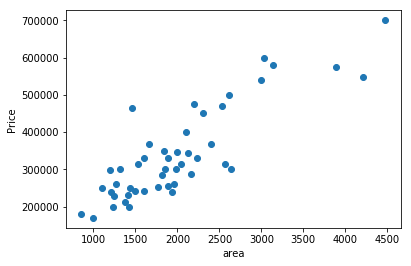

In [24]:
# Graficando las variables
plt.scatter(x,y)
plt.ylabel('Price')
plt.xlabel('area')

In [32]:
## Normalizar Data ##

In [25]:
x_mean = x.mean()
x_std = x.std()
x_mean

2000.6808510638298

In [26]:
x_std

786.2026187430467

In [27]:
# Generando la media y std
y_mean, y_std = y.mean(), y.std()

In [28]:
y_mean

340412.6595744681

In [29]:
y_std

123702.5360061474

In [30]:
x = (x-x_mean)/x_std

In [31]:
y = (y-y_mean)/y_std


## Regresion Lineal ## 

In [34]:
# Asignar Variables
newData = data[["area"]]

In [35]:
x_Train = np.array(newData)

In [36]:
# Target 
y_Train = data['price'].values
y_Train

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [39]:
# Creamos el objeto de Regresion Lineal
mRegresionLineal = linear_model.LinearRegression()

In [40]:
#Entrenar
# Fit  como la recta que desxribe mejor nuestros datos  (fit=lm(x~t))
mRegresionLineal.fit(x_Train, y_Train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_Predict = mRegresionLineal.predict(x_Train)

In [42]:
# Veamos los coeficientes obtenidos, seria la tangente
print('Coeficientes : ', mRegresionLineal.coef_)

Coeficientes :  [134.52528772]


In [43]:
# Valor Donde corta el eje Y ( en X=0)
print('Termino Idependiente', mRegresionLineal.intercept_)

Termino Idependiente 71270.49244872911


In [44]:
# Media de Error cuadratico
print("Media de Error cuadratico  : %.2f"% mean_squared_error(y_Train, y_Predict))

Media de Error cuadratico  : 4116265480.87


In [45]:
# Media de Error cuadratico
print("Variance score : %.2f"% r2_score(y_Train, y_Predict))

Variance score : 0.73


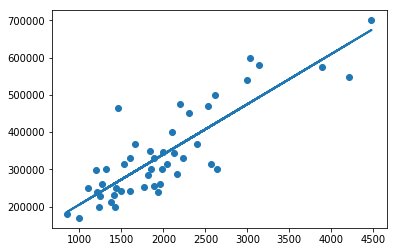

In [46]:
plt.scatter(x_Train,y_Train)
plt.plot(x_Train, y_Predict, lw=2)
plt.show()